# [Машинное обучение на ФБМФ](https://thetahat.ru/courses/bm-2025-spr)

## Случайный лес, часть 1

In [1]:
# Bot check

# HW_ID: bt_ml_sem6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import scipy.stats
from tqdm import tqdm_notebook
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn import tree
sns.set(context='poster')
%matplotlib inline

### Задача 1:

Скачайте датасет про классификацию женщин с диабетом. Разделите на трейн и тест.

In [196]:
data = pd.read_csv("diabetes.csv")

In [198]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [200]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [202]:
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучите обычное решающее дерево глубины 3. Выведите его графическое представление, а также accuracy на тренировочной и тестовой выборке.

In [207]:
clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Посчитайте accuracy

In [265]:
predictions_test = clf.predict(X_test)
predictions_train = clf.predict(X_train)
print('tree accuracy test:', accuracy_score(predictions_test, y_test))
print('tree accuracy train:', accuracy_score(predictions_train, y_train))

tree accuracy test: 0.7597402597402597
tree accuracy train: 0.7768729641693811


Визуализируйте дерево

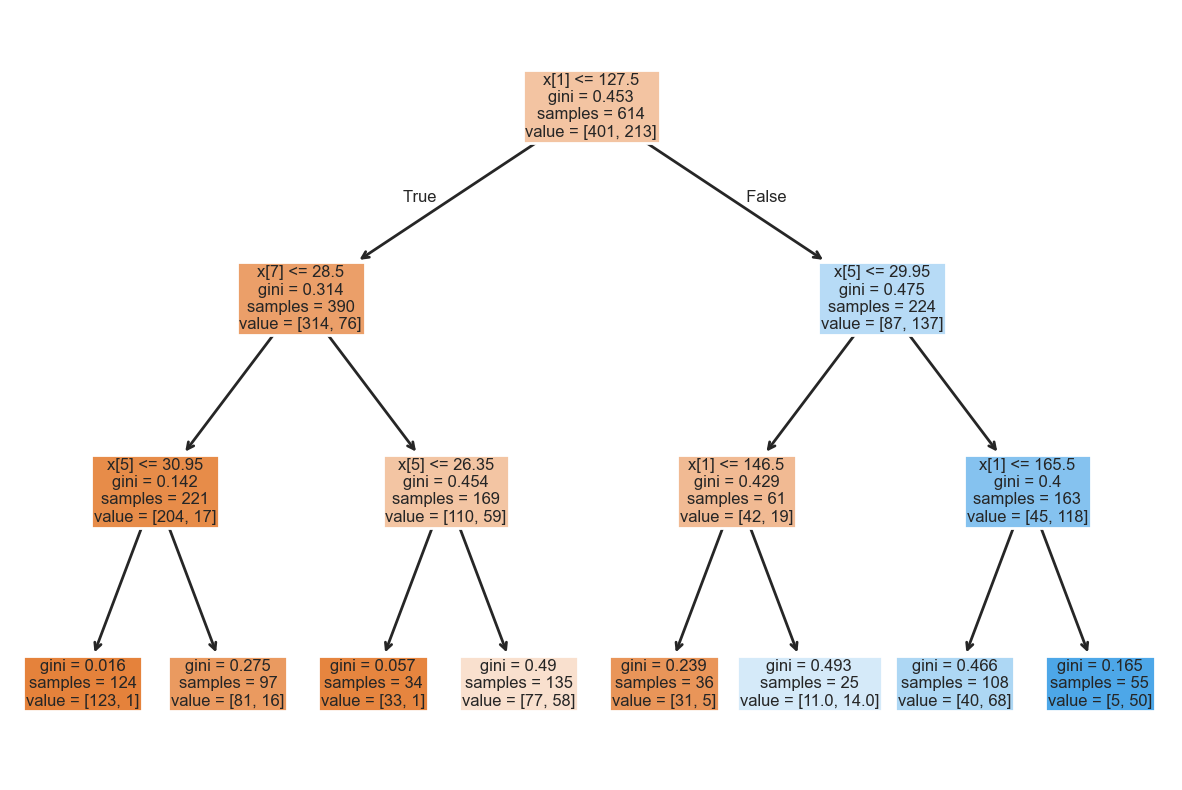

In [213]:
plt.figure(figsize=(15, 10))
plot_tree(clf, filled = True)
plt.show()

Теперь обучите случайный лес с 100 деревьями.

In [246]:
n_estimators = 100

rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

Выведите параметры леса.

In [249]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [251]:
common_keys = rf_clf.get_params().keys() & clf.get_params().keys()
common_keys

{'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'monotonic_cst',
 'random_state'}

Какие параметры уже известны и относятся к решающему дереву?

**Ответ:** Параметры 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'monotonic_cst',
 'random_state' общие для дерева и леса



Появляются новые важные гиперпараметры: n_estimators (количество деревьев в лесу). Также важным является гиперапараметр max_features &mdash; максимальное количество признаков, которые могут быть перебраны при разбиении вершины дерева. Перед каждым разбиением дерева генерируется выборка из `min(k, max_features)` случайных признаков (`k` — количество признаков в датасете) и только эти признаки рассматриваются как разделяющие в данной вершине.

Выведите качество, сравните с деревом.

In [267]:
predictions_test = rf_clf.predict(X_test)
predictions_train = rf_clf.predict(X_train)
print('forest accuracy test:', accuracy_score(predictions_test, y_test))
print('forest accuracy train:', accuracy_score(predictions_train, y_train))

forest accuracy test: 0.7207792207792207
forest accuracy train: 1.0


**Вывод:** Видим, что изменения различны для теста на тренировочных данных и на тестовых. В случае тренировочных данных видим, что лес переобучился максимально, что характерно для леса. А вот на тестовых данных результаты для ограниченного дерева и для леса примерно сопоставимы.

Нарисуйте первые 6 деревьев леса.

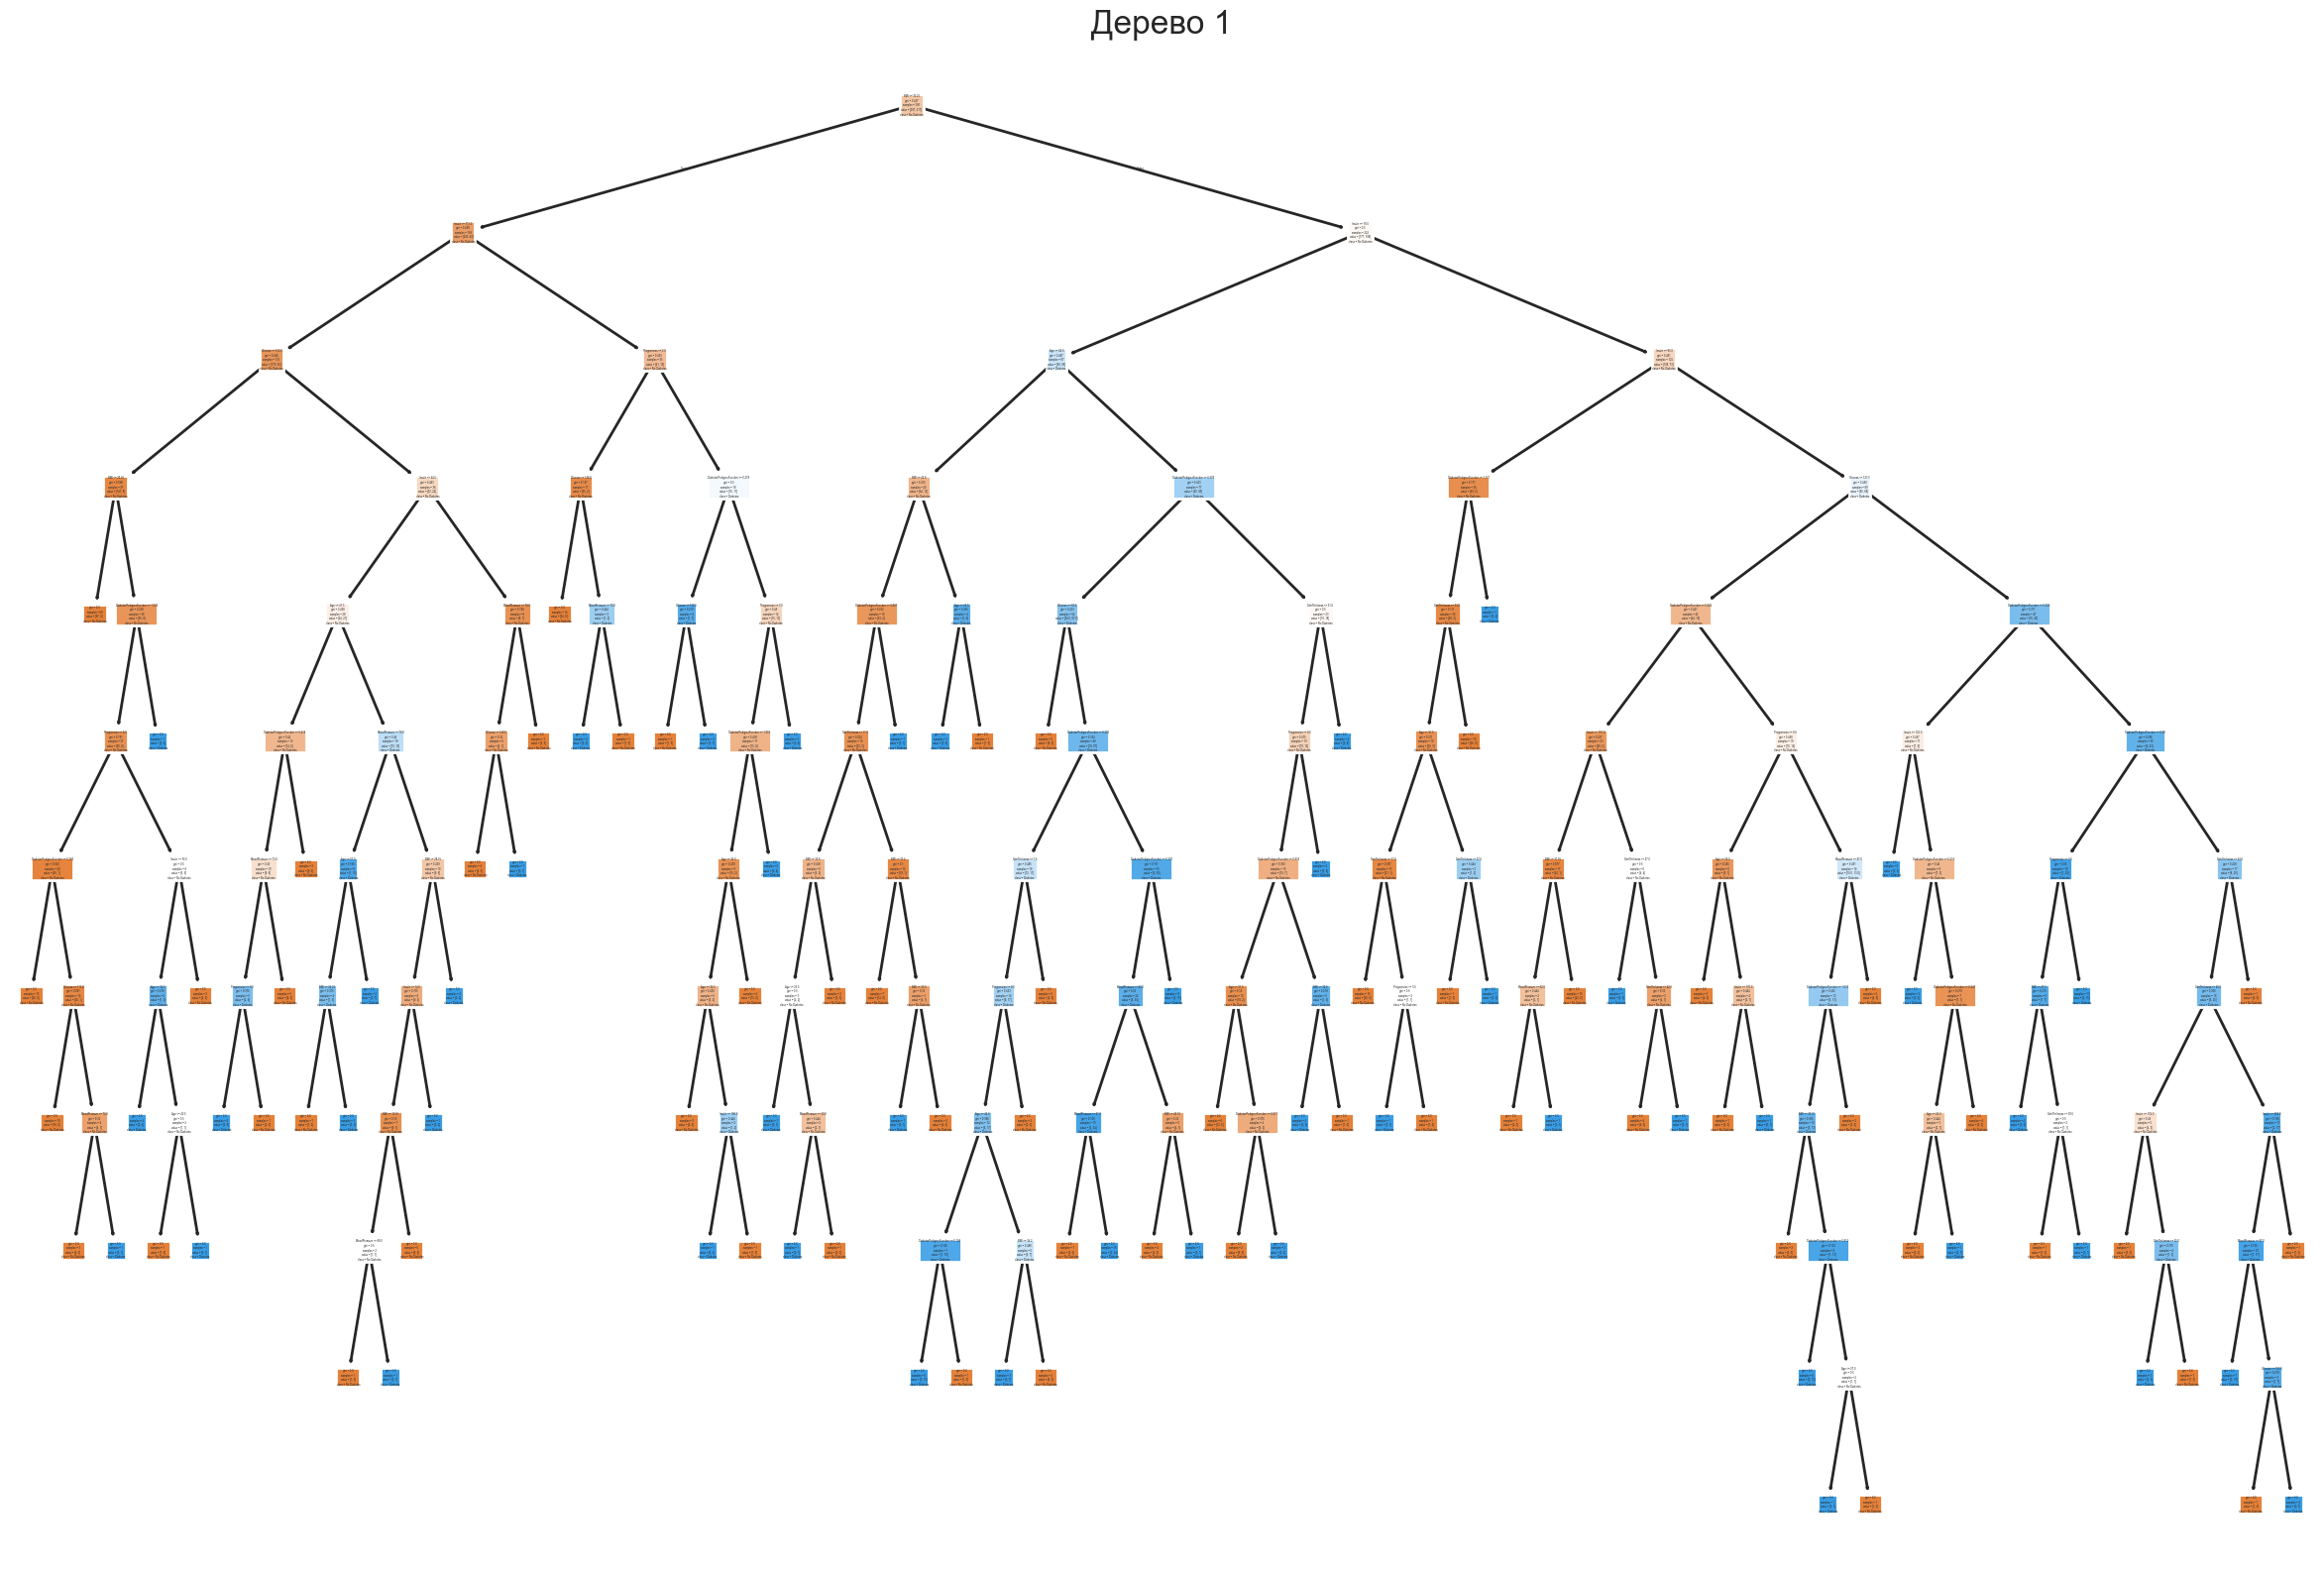

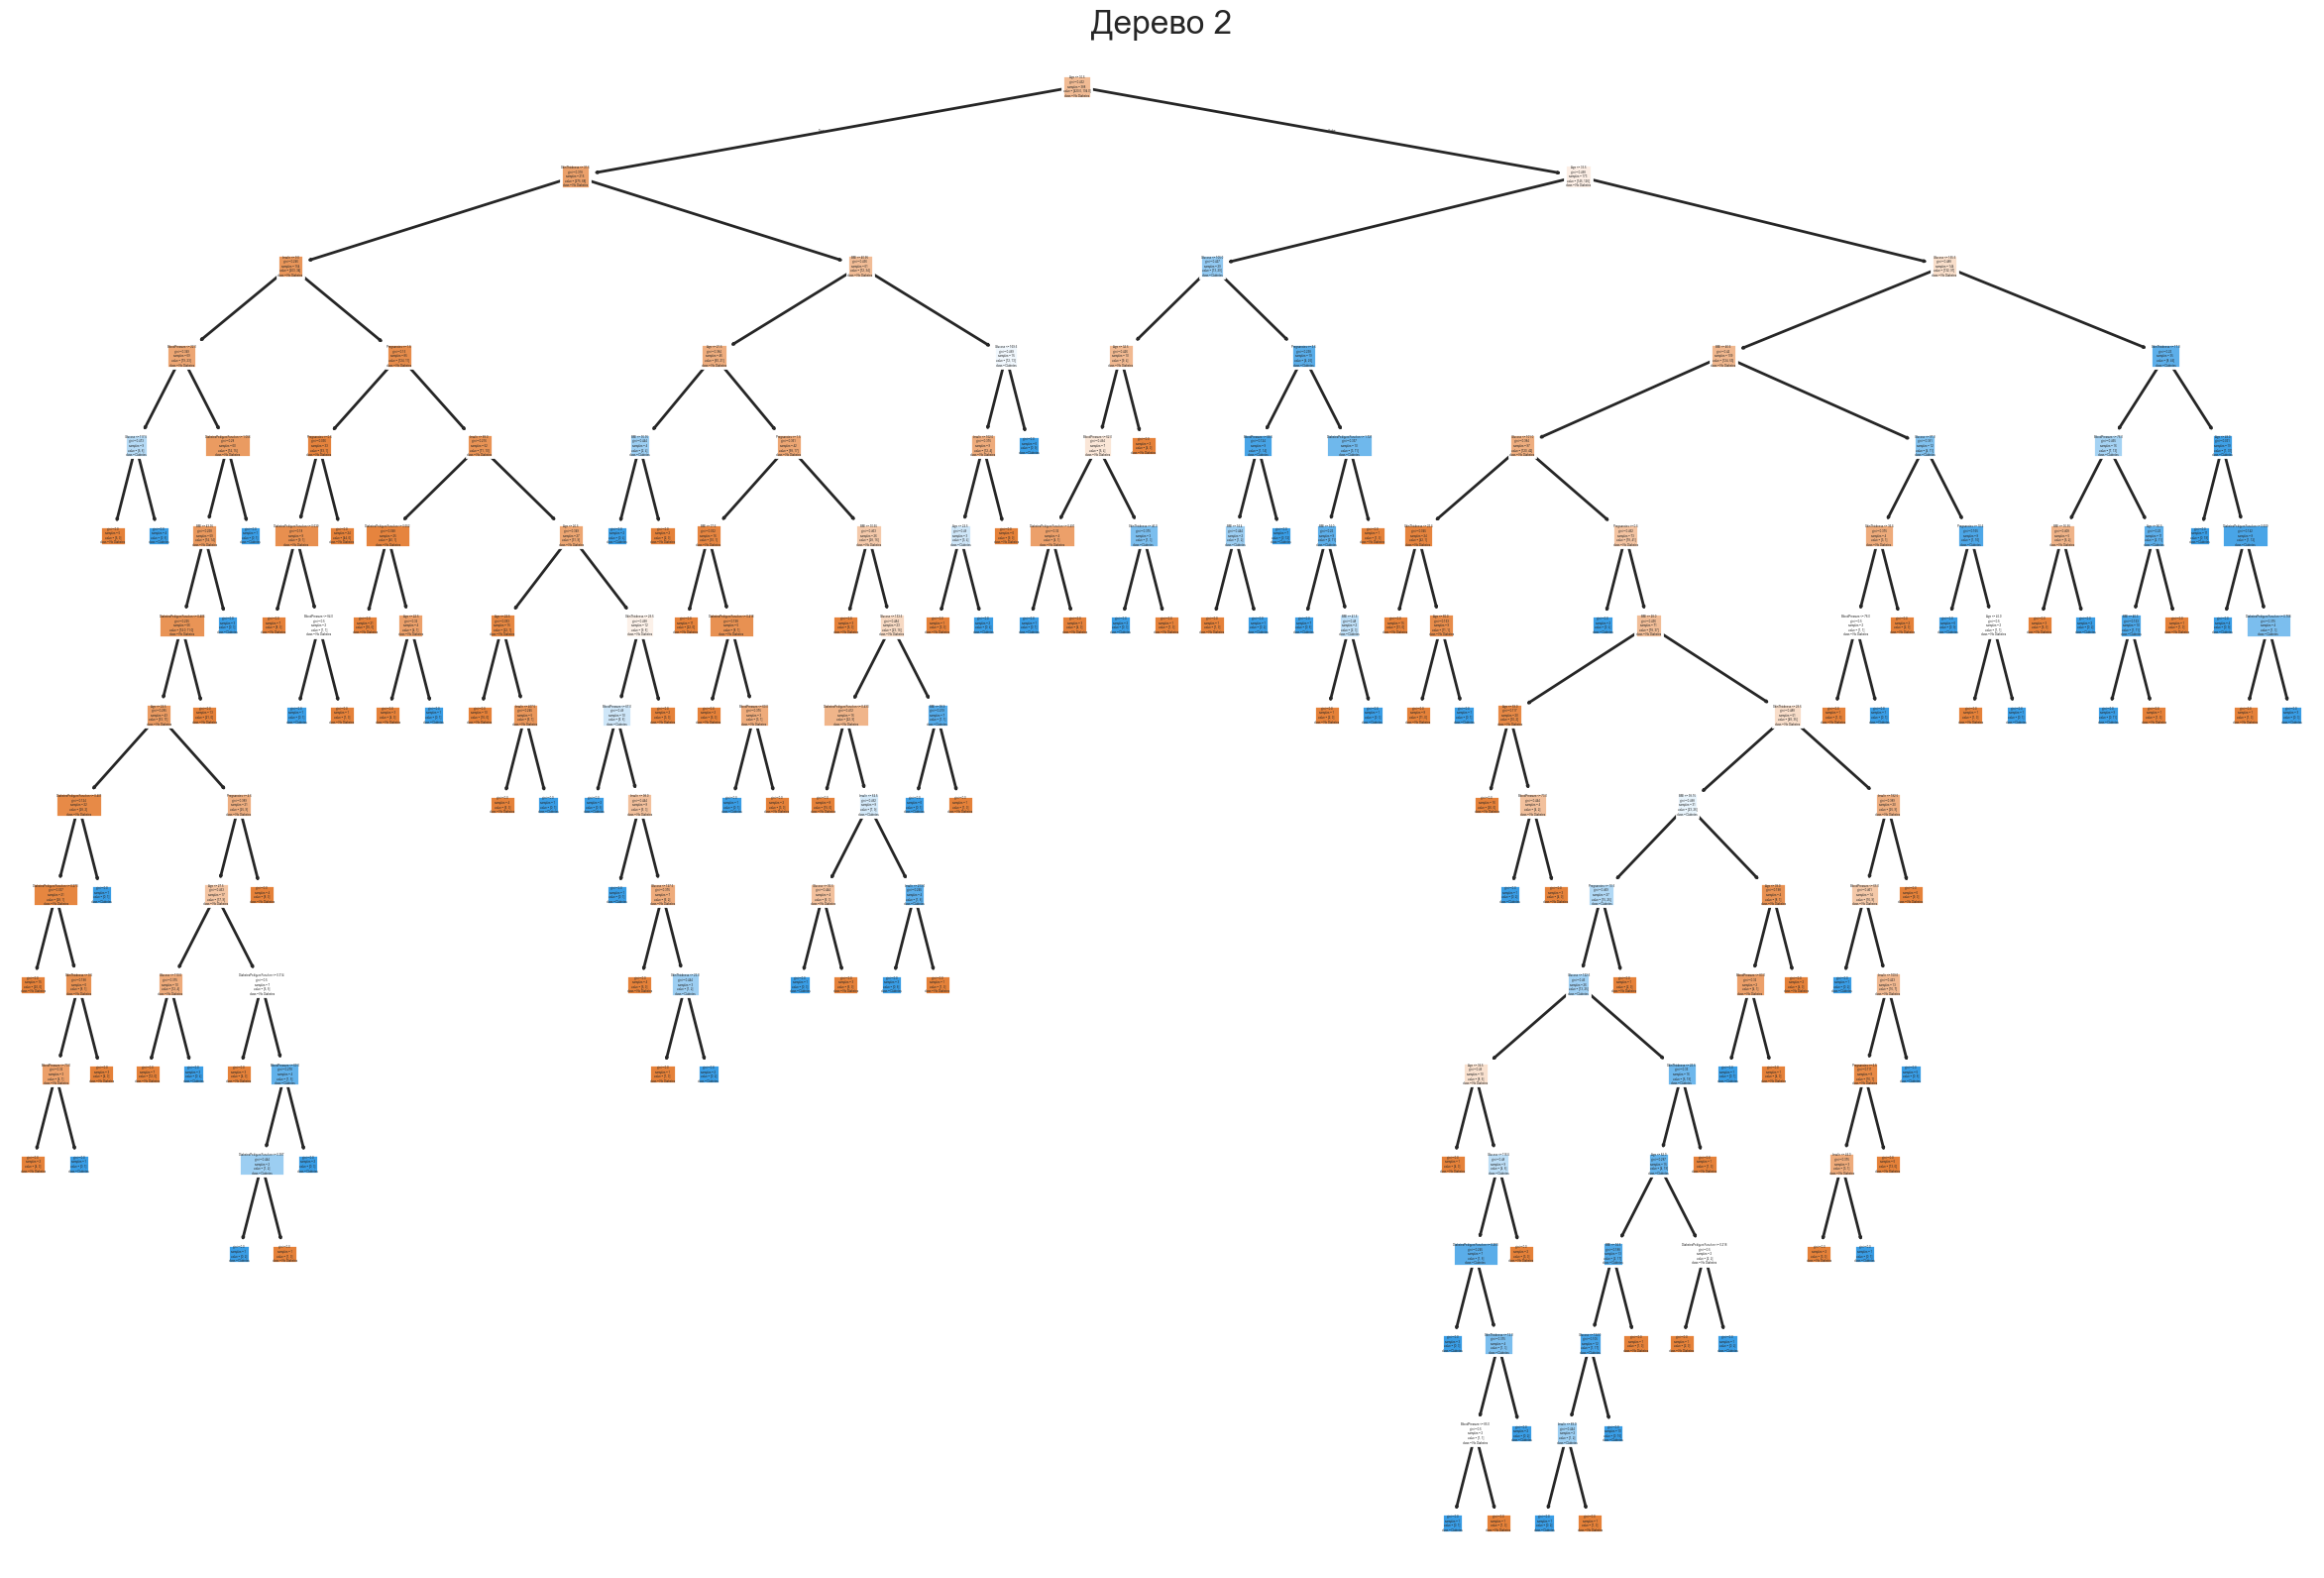

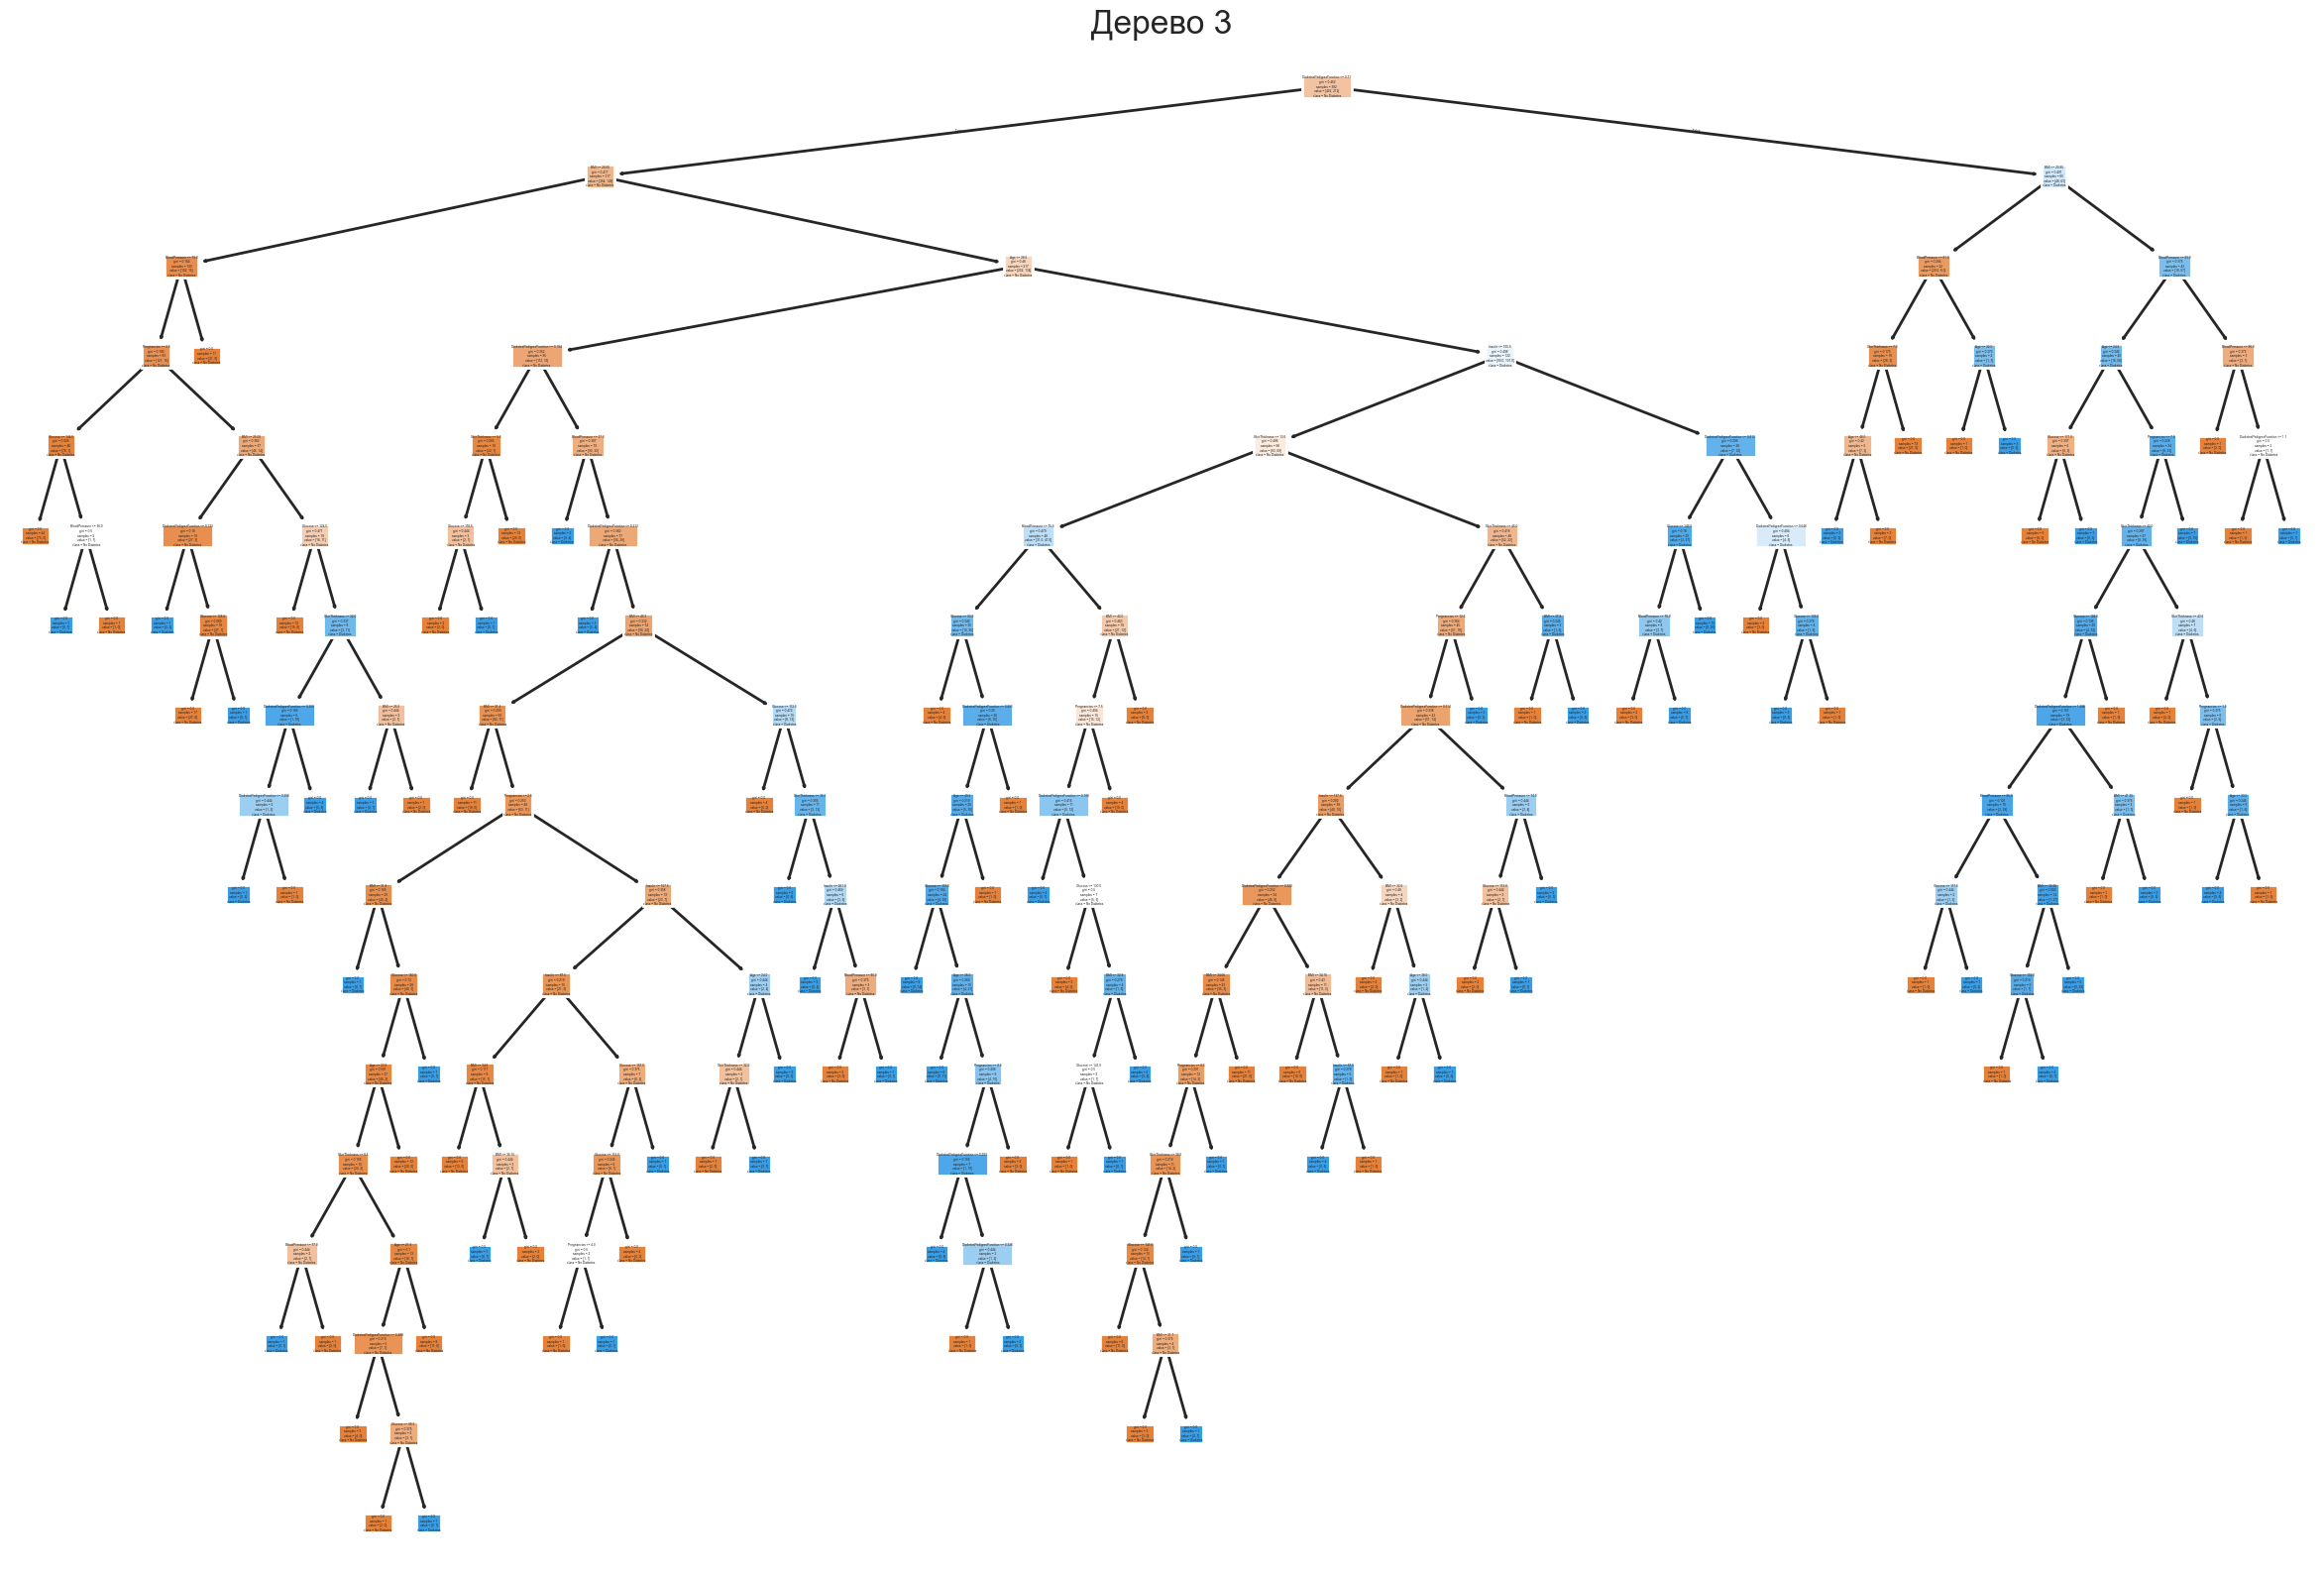

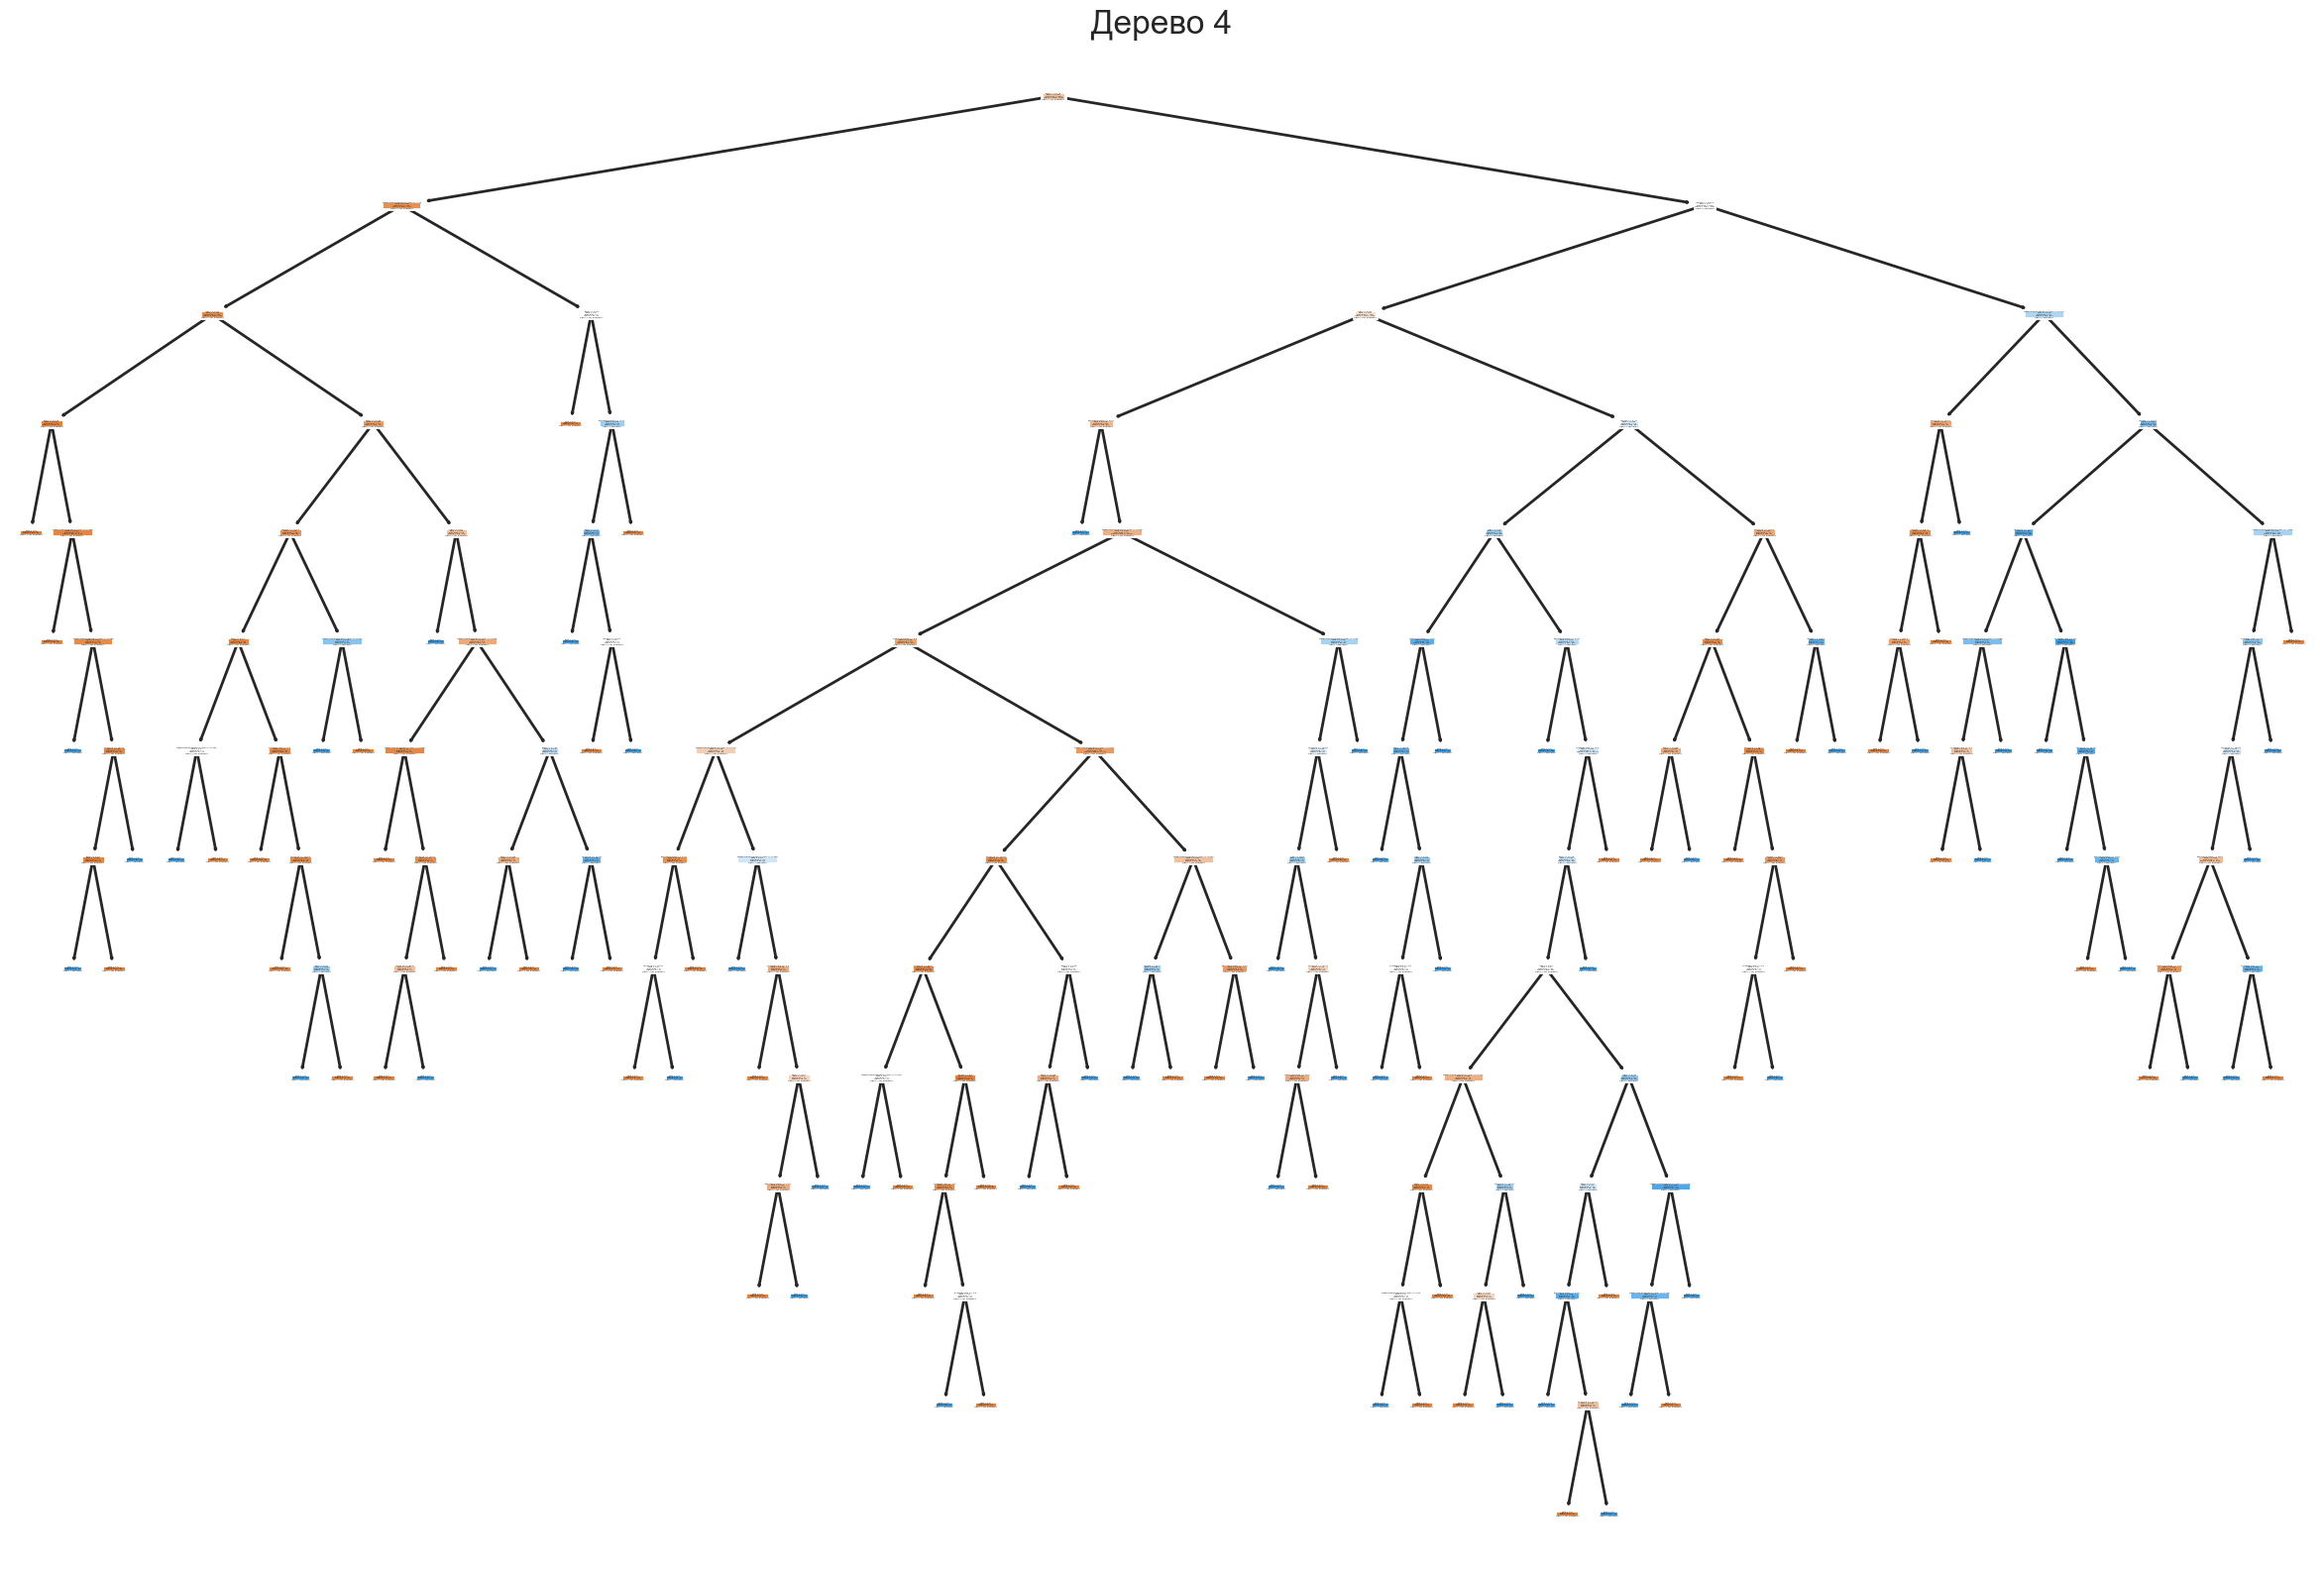

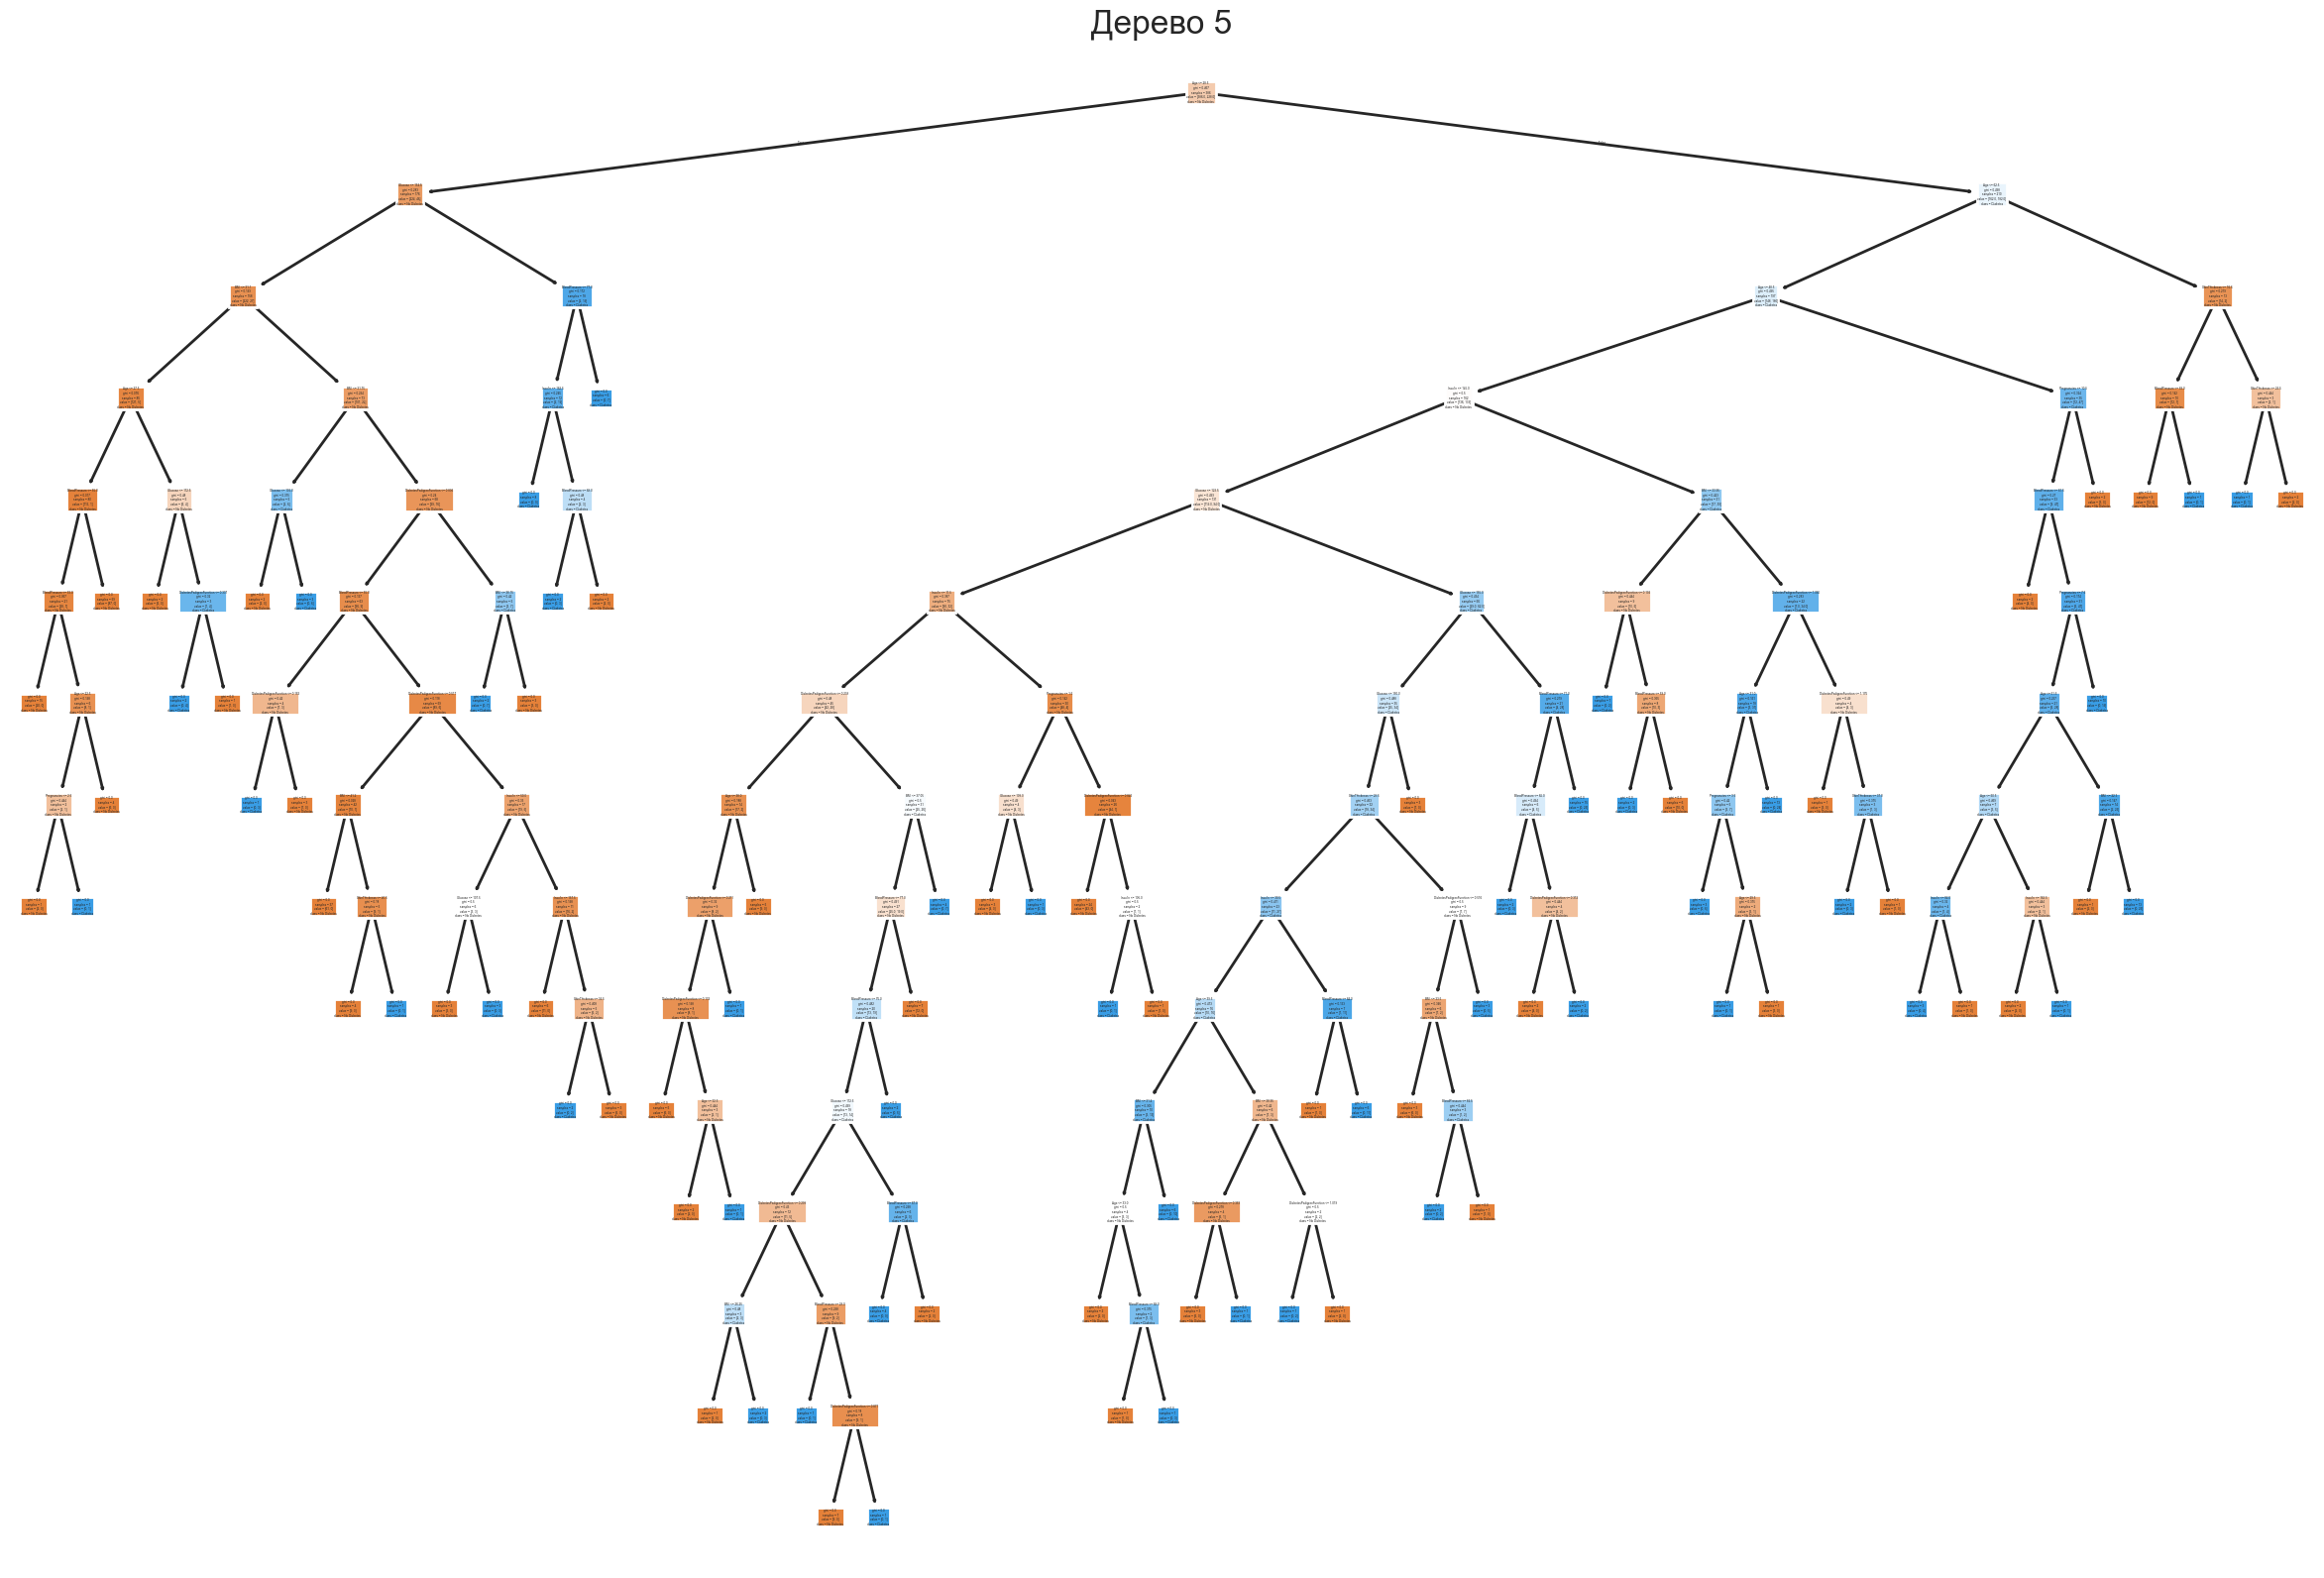

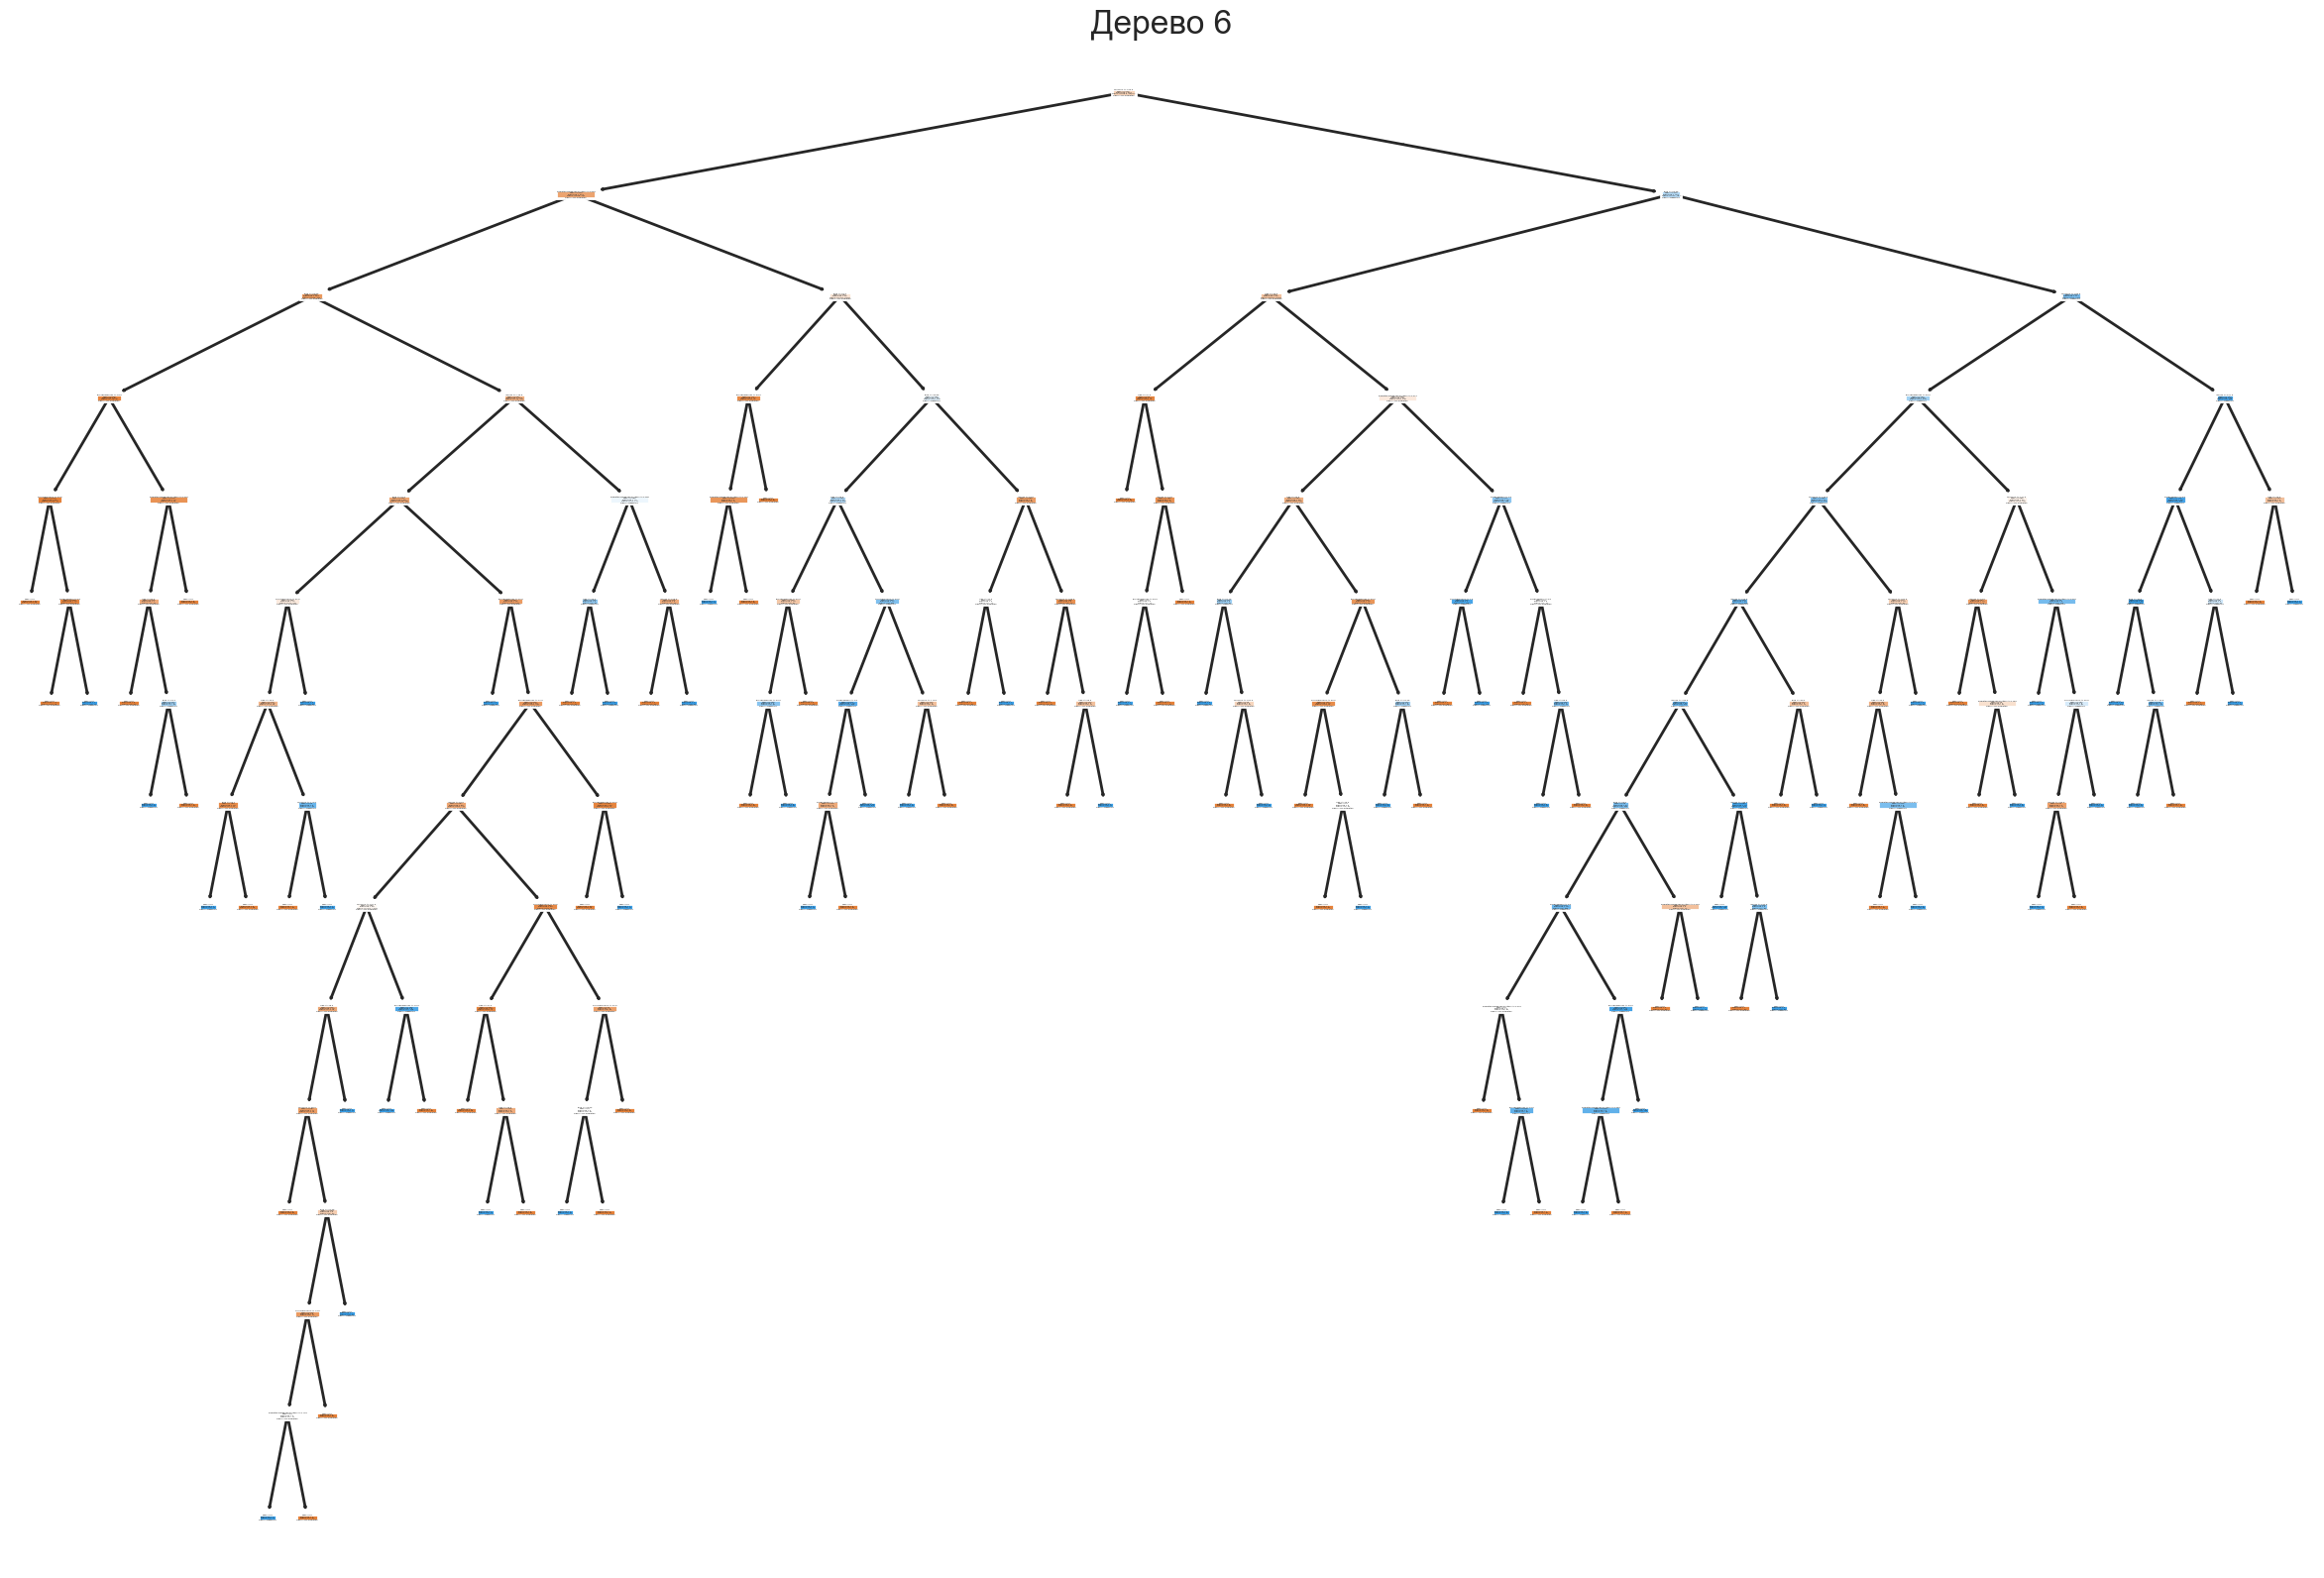

In [271]:
trees = rf_clf.estimators_[:6]

for i, tree in enumerate(trees, 1):
    plt.figure(figsize=(30, 20))
    plot_tree(tree, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
    plt.title(f"Дерево {i}")
    plt.show()

Как выглядят деревья в решающем лесе? Насколько они отличаются от обученного ранее дерева и друг от друга?

**Вывод:** Деревья в случайном лесе мы не ограничивали в глубину и как раз в лесе они переобучаются, но за счёт взятия среднего получаем хорошие значения. Причём эти деревья сильно отличаются друг от друга. А вот одно решающее дерево мы ограничили по глубине, чтобы не переобучить

## Случайный лес, часть 2

### Задача 2

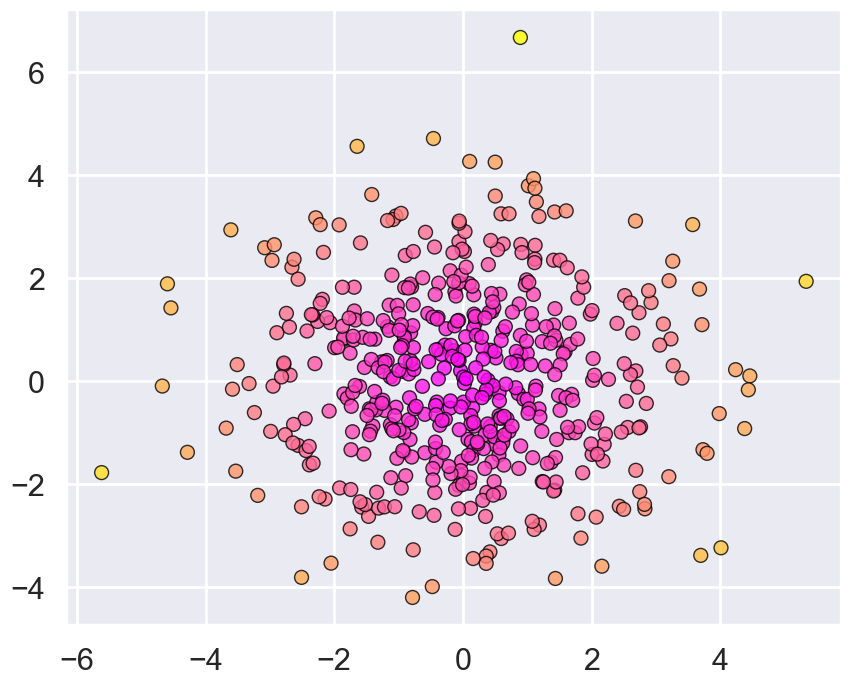

In [122]:
np.random.seed(42)
X_train = scipy.stats.multivariate_normal.rvs(
    size=500, mean=[0, 0], cov=[[3, 0], [0, 3]]
)
y_train = (X_train[:, 0] ** 2 + X_train[:, 1] ** 2) ** 0.5

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='spring',
            s=100, alpha=0.8, linewidths=1, edgecolors='black')
plt.show()

### Зависимость  качества предсказаний леса от `n_estimators`

Создадим тестовую выборку

In [126]:
np.random.seed(42)
X_test = scipy.stats.multivariate_normal.rvs(
    size=1000, mean=[0, 0], cov=[[3, 0], [0, 3]]
)
y_test = (X_test[:, 0] ** 2 + X_test[:, 1] ** 2) ** 0.5

In [132]:
def cum_metric(model, metric, x_test, y_test):
    '''
    Считает значение метрики в зависимости от количества деревьев в модели

    Мы не обучаем много лесов с разным кол-вом деревьев,
    а смотрим на один обученный лес. Предсказание леса из k деревьев —
    усредненное предсказание первых k деревьев из нашего леса.

    Параметры.
    1) model — модель случайного леса,
    2) metric — вычисляемая метрика,
    3) x_test — данные тестовой выборки,
    4) y_test — метки тестовой выборки.
    '''

    predictions_by_estimators = [est.predict(x_test) for est in model.estimators_] # предсказания конкретных деревьев

    cumpred = np.array(predictions_by_estimators).cumsum(axis=0) \
              / (np.arange(len(predictions_by_estimators)) + 1)[:, np.newaxis] # усреднение первых k моделей для k от 1 до n_estimators

    cumacc = [metric(y_test, pred) for pred in cumpred] # значения метрики качества для k деревьев
    return np.array(cumacc)

Визуализируем значение метрики MSE в зависимости от количества деревьев в модели.
Поскольку каждая модель является случайной, **проведем обучение 1000 раз** и усредним значения метрики.
На графике также нарисуем полупрозрачными кривыми зависимость MSE от количества деревьев для каждой модели.

  0%|          | 0/1000 [00:00<?, ?it/s]

<Figure size 1800x900 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

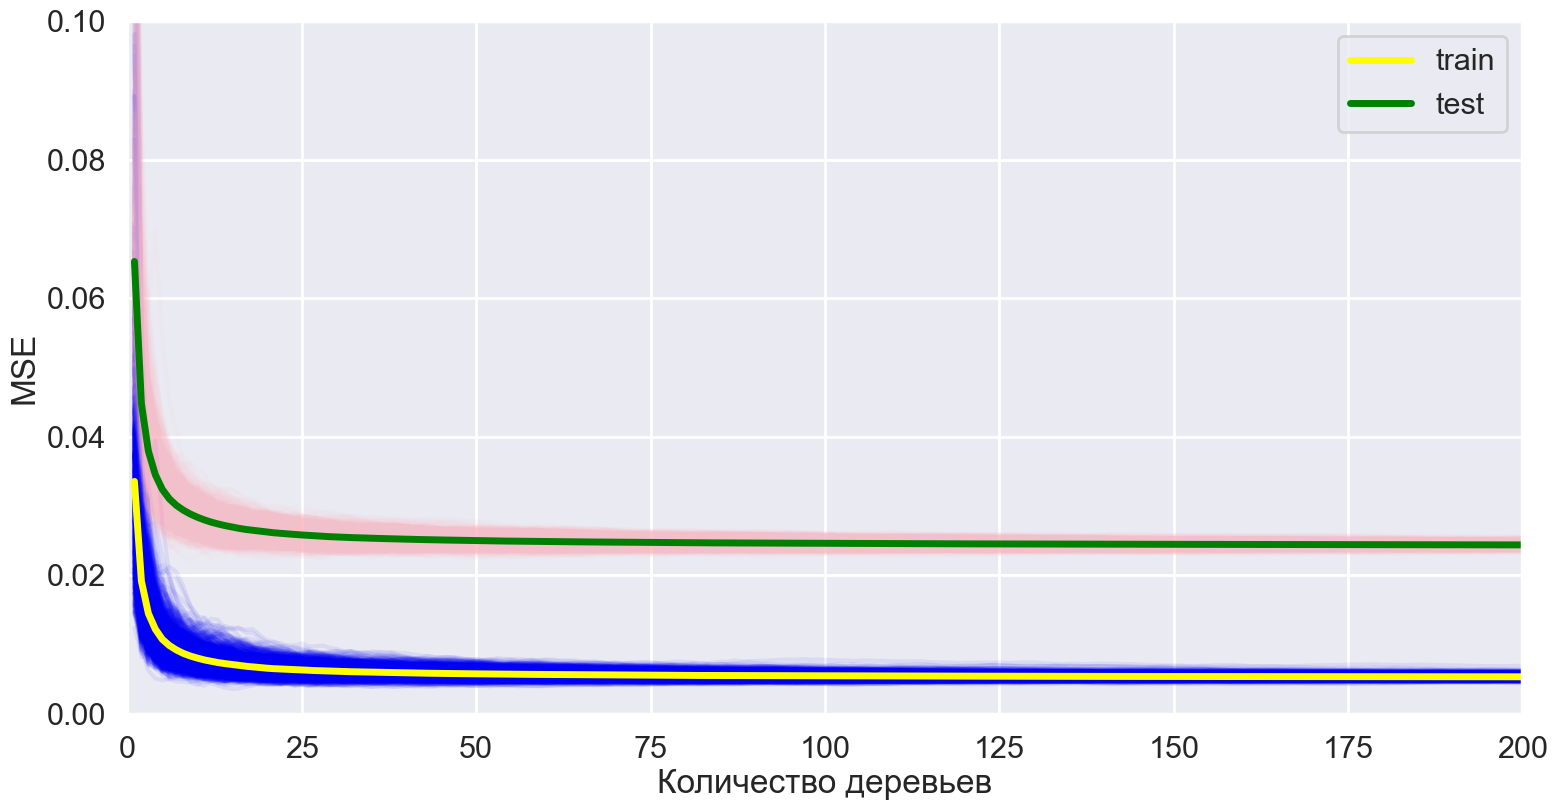

CPU times: total: 7min 32s
Wall time: 8min 4s


In [141]:
%%time

n_iterations = 1000
n_estimators = 200
scores_train = np.zeros((n_iterations, n_estimators))
scores_test = np.zeros((n_iterations, n_estimators))
estrimator_range = np.arange(n_estimators) + 1

plt.figure(figsize=(18, 9))

for i in tqdm_notebook(range(n_iterations), leave=False):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=i)
    rf.fit(X_train, y_train)
    scores_train[i] = cum_metric(rf, MSE, X_train, y_train)
    scores_test[i] = cum_metric(rf, MSE,  X_test, y_test)
    plt.plot(estrimator_range, scores_train[i], color='blue', alpha=0.07)
    plt.plot(estrimator_range, scores_test[i], color='pink', alpha=0.07)

plt.plot(estrimator_range, scores_train.mean(axis=0),
         lw=5, color='yellow', label='train')
plt.plot(estrimator_range, scores_test.mean(axis=0),
         lw=5, color='green', label='test')
plt.xlabel('Количество деревьев'), plt.ylabel('MSE')
plt.xlim((0, 200)), plt.ylim((0, 0.1))
plt.legend()
plt.show()

Как ведет себя ошибка с увеличением количества деревьев? Есть ли переобучение? Как это связано с пройденной теорией?

Ошибка уменьшается и приходит к минимальному значению, что обусловлено переобучением. А так же с какого-то количества деревьев они начинают повторяться, так что среднее тоже приходит к одному значению

### Зависимость  качества предсказаний леса от значений гиперпараметров

Теперь исследуем зависимость качества предсказаний случайного леса от значений гиперпараметров. Рассмотрим датасет `diabetes` из `sklearn`. В нём исследуется численная оценка прогрессирования диабета у пациентов на основе таких признаков, как возраст, пол, масса тела, среднее кровяное давление и некоторых других. Для того, чтобы лучше понять, что из себя представляют признаки в этом датасете, можно обратиться к этой странице: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html.

In [145]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [147]:
print('data shape:', X.shape)
print('target shape:', y.shape)

data shape: (442, 10)
target shape: (442,)


Как и в предыдущих экспериментах, разобьём данные на обучение и тест.

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

Подберём оптимальные параметры для `RandomForestRegressor` по сетке.

In [163]:
estimator=RandomForestRegressor(random_state=42)
param_grid={
      'max_depth': [3, 5, None],
      'n_estimators': [5, 10, 25, 50],
      'min_samples_leaf': [1, 2, 5],
      'min_samples_split': [2, 5]
  }
tree_gridsearch = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [165]:
tree_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [5, 10, 25, 50]},
             scoring='neg_mean_squared_error', verbose=1)

Выведите лучшие параметры.

In [168]:
print(tree_gridsearch.best_params_)

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}


Посчитаем значение метрики `r2-score` для лучшей модели.

In [171]:
print('train r2_score {:.4f}'.format(
    r2_score(y_train, tree_gridsearch.best_estimator_.predict(X_train))
))
print('test r2_score {:.4f}'.format(
    r2_score(y_test, tree_gridsearch.best_estimator_.predict(X_test))
))

train r2_score 0.6970
test r2_score 0.4753


Теперь попробуем резко увеличить значение `min_samples_leaf`. Проведите аналогичный эксперимент.

In [173]:
high_min_samples_leaf = RandomForestRegressor(random_state=42, max_depth=5, min_samples_leaf = 500, min_samples_split = 2, n_estimators = 50)
high_min_samples_leaf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=500, n_estimators=50,
                      random_state=42)

In [177]:
print('train r2_score {:.4f}'.format(
    r2_score(y_train, high_min_samples_leaf.predict(X_train))
))
print('test r2_score {:.4f}'.format(
    r2_score(y_test, high_min_samples_leaf.predict(X_test))
))

train r2_score -0.0002
test r2_score -0.0105


**Вывод.**

Теперь попробуем, наоборот, сделать значение `min_samples_leaf` меньше оптимального.

In [181]:
small_min_samples_leaf = RandomForestRegressor(random_state=42, max_depth=5, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)
small_min_samples_leaf.fit(X_train, y_train)

print('train r2_score {:.4f}'.format(
    r2_score(y_train, small_min_samples_leaf.predict(X_train))
))
print('test r2_score {:.4f}'.format(
    r2_score(y_test, small_min_samples_leaf.predict(X_test))
))

train r2_score 0.7343
test r2_score 0.4569


**Вывод.**

При резком увеличении мы получаем неглубокие деревья и плохое качество обучения. А вот когда мы выставляем минимальное количество = 1, то мы суперпереобучаем и скор на трейне вырастает (так как подгоняется под тренировочную выборку), в то же время скор на тесте падает, что тоже логично.